Разбор задания от Тинкофф


In [4]:
import pandas as pd
import numpy as np
import math
from scipy.stats import kstest
from scipy.stats import shapiro
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Выведем первые 5 строк предоставленного датасета.

In [6]:
data = pd.read_csv("data.csv", sep=",")
data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Удаляю лишние столбы с ссылками на картинки.

In [8]:
to_delete = ['Flag', 'Photo', 'Club Logo']
for el in to_delete:
  data.drop(el, inplace=True, axis=1)
data.head(5)

KeyError: ignored

Имеем данные о 18207 футболистах, дубликаты не были найдены.

In [9]:
data.shape

(18207, 86)

In [10]:
data[data.duplicated(keep=False)]

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


Получены данные о футболистах.
Предоставленные столбцы: 

**Name** - имя

**Nationality** - национальность

**Overall** - общий показатель??

**Potential** - потенциал, метрика, которая позволит узнать насколько хорошо игрок себя проявит в следующих играх

**Club** - клуб, которому принадлежит игрок

**Value** - цена за игрока

**Wage** - зароботная плата футболисту

Общие метрики: имя, рост, вес, национальность, возраст, клуб, заробатная плата, цена за игрока, позиция в игре.

Ключевыми метриками я бы выбрала те, которые бы решали определенную задачу. Например, метрики можно поделить на следующие группы: связанные с физиологией (рост, вес), расчетливые(боевые метрики), технически метрики для атаки, технические метрики для защиты, психологические(концентрация, мотивация).

**Гипотезы, которые можно сформулировать**:
1. Существует ли статистически значимая разница между international reputations игроков из Европы и не Европы?
2. Что влияет на заработок игрока? Какими показателями должен обладать игрок, чтобы зарабатывать больше?
3. Игроки какой страны имеют наибольший показатель в агрессивной игре?
4. Влияет ли возраст на international reputation?  
5. Существует ли статистически значимая разница между international reputations игроков из Европы и не Европы?


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Value                     18207 non-null  object 
 9   Wage                      18207 non-null  object 
 10  Special                   18207 non-null  int64  
 11  Preferred Foot            18159 non-null  object 
 12  International Reputation  18159 non-null  float64
 13  Weak Foot                 18159 non-null  float64
 14  Skill 

In [12]:
# Анализ датасета
# we are going to find out about numerical and non-numerical features
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print ('Категориальные признаки: ',categorical_columns)
print ('числовые признаки: ',numerical_columns)

Категориальные признаки:  ['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']
числовые признаки:  ['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning'

Посмотрим на количество уникальных значений для всех представленных столбцов из датасета.

In [13]:
columns = data.columns
for col in columns:
  n = len(pd.unique(data[col]))
  print(f"No.of.unique values for {col}: {n}")

No.of.unique values for Unnamed: 0: 18207
No.of.unique values for ID: 18207
No.of.unique values for Name: 17194
No.of.unique values for Age: 29
No.of.unique values for Nationality: 164
No.of.unique values for Overall: 48
No.of.unique values for Potential: 47
No.of.unique values for Club: 652
No.of.unique values for Value: 217
No.of.unique values for Wage: 144
No.of.unique values for Special: 1422
No.of.unique values for Preferred Foot: 3
No.of.unique values for International Reputation: 6
No.of.unique values for Weak Foot: 6
No.of.unique values for Skill Moves: 6
No.of.unique values for Work Rate: 10
No.of.unique values for Body Type: 11
No.of.unique values for Real Face: 3
No.of.unique values for Position: 28
No.of.unique values for Jersey Number: 100
No.of.unique values for Joined: 1737
No.of.unique values for Loaned From: 342
No.of.unique values for Contract Valid Until: 37
No.of.unique values for Height: 22
No.of.unique values for Weight: 58
No.of.unique values for LS: 94
No.of.uni

Построим график, по которому можно узнать сколько футболистов представляют свою страну.

In [14]:
# Countries of Soccer Player Number
import plotly.express as px

x1 = list(data.Nationality.unique())
y1 = list(len(data[data["Nationality"]==each]) for each in x1)

df=pd.DataFrame()
df["Country"]=x1
df["NumberOfPlayers"]=y1

df_n=df.sort_values("NumberOfPlayers",ascending=False)
fig = px.bar(df_n, x="NumberOfPlayers", y="Country", orientation='h',title=" Countries with the Most Players")
fig.show()

Выведем топ 20 стран с наибольшим количеством игроков.
Можно заметить, что самое большое количество футболистов из Англии.

In [15]:
fig = px.bar(df_n.head(20), x="NumberOfPlayers", y="Country", orientation='h',title="Top 20 Countries with the Most Players")
fig.show()

<Figure size 1080x576 with 0 Axes>

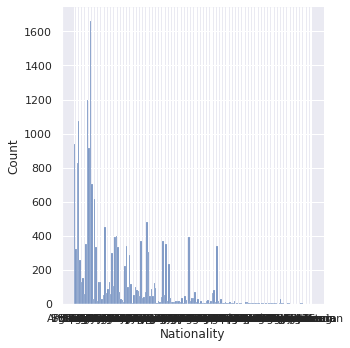

In [ ]:
plt.figure(figsize=(15,8))
sns_plot = sns.displot(data['Nationality'])

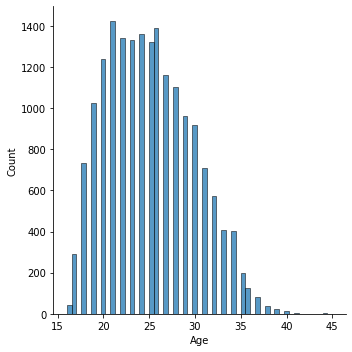

In [ ]:
sns_plot = sns.displot(data['Age'])

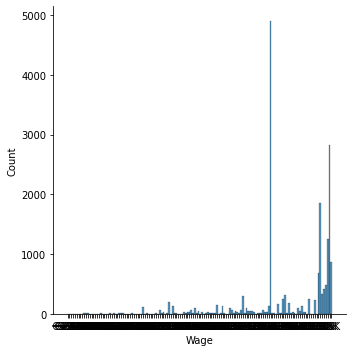

In [ ]:
sns_plot = sns.displot(data['Wage'])

На матрице корреляций выводим коэффициент корреляции для соответствующих пар признаков.

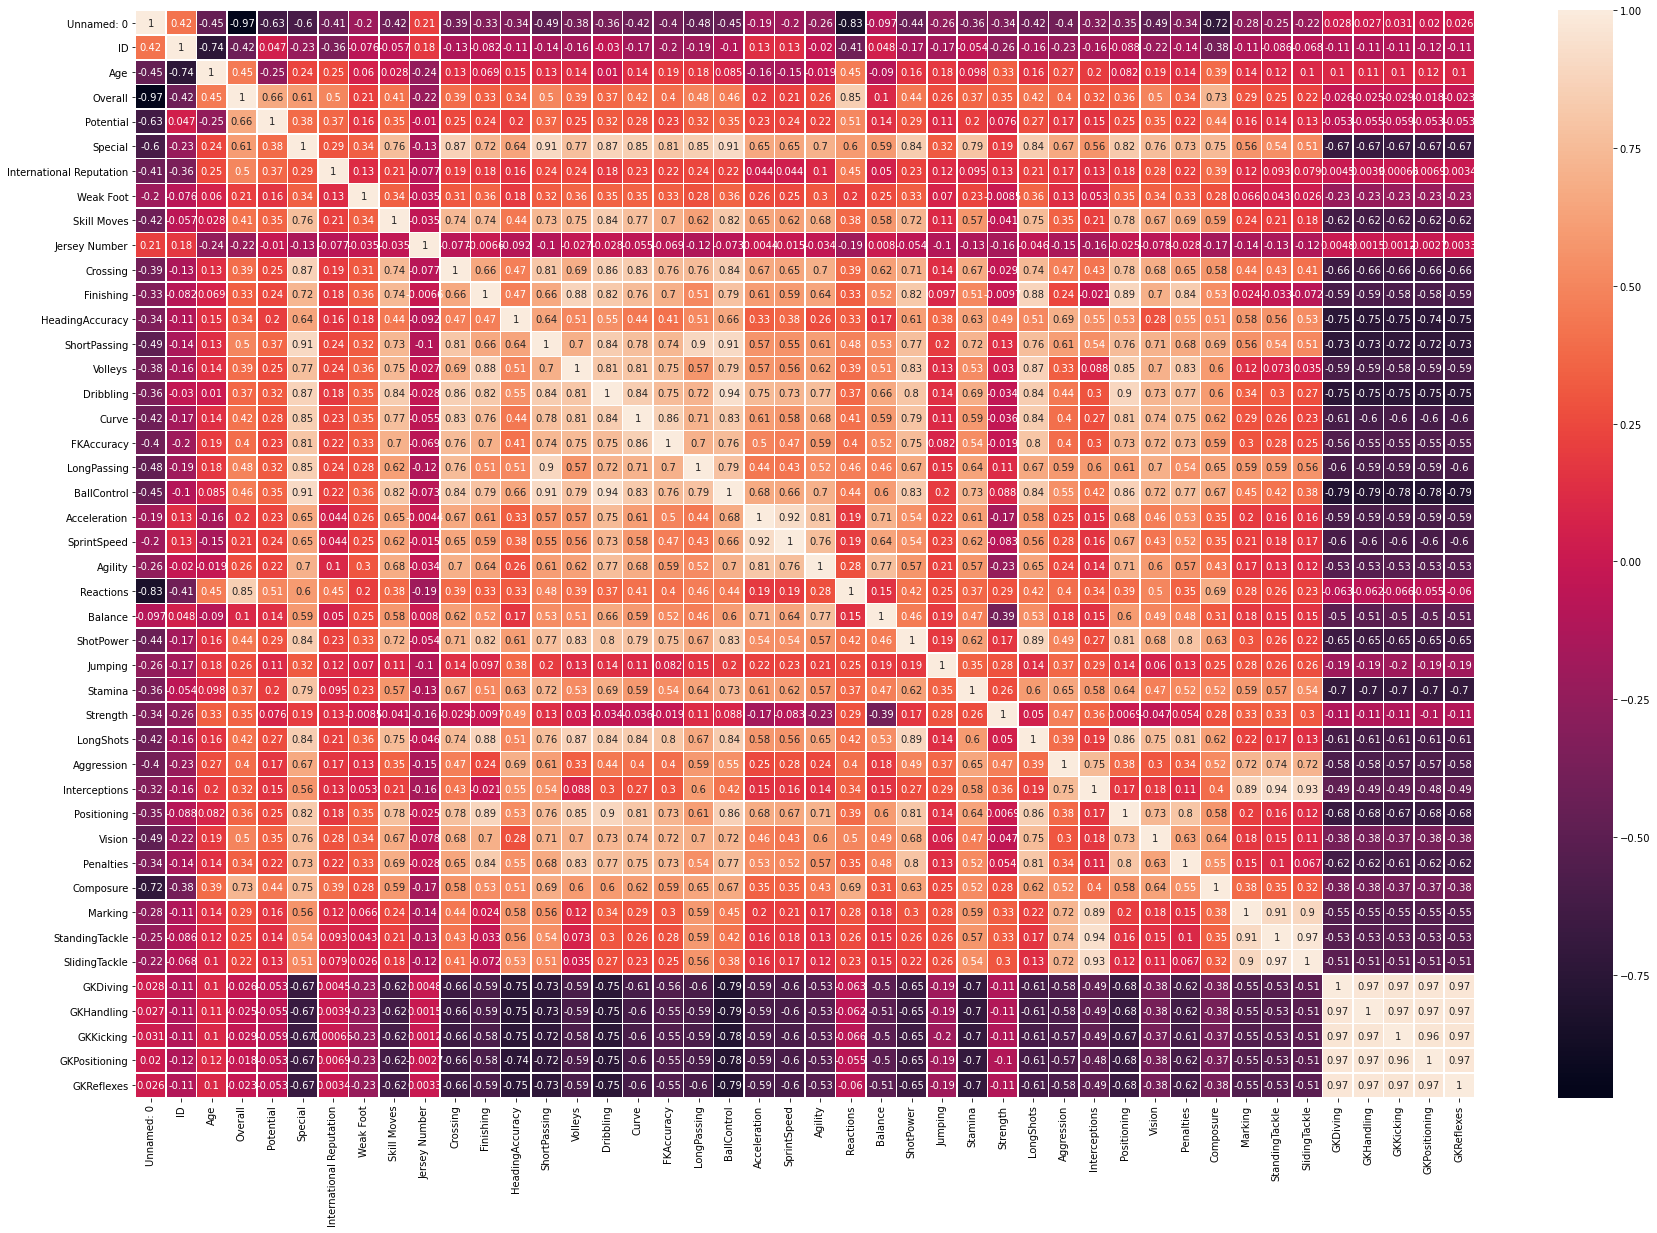

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5)

Поработаем с определёнными данными из датасета, возьмем только имя, возраст, overall, potential, value, wage.

In [22]:
new = data.filter(['Name','Age','Overall','Potential', 'Value', 'Wage'], axis=1)
new.head(10) 

,Name,Age,Overall,Potential,Value,Wage
0,L. Messi,31,94,94,€110.5M,€565K
1,Cristiano Ronaldo,33,94,94,€77M,€405K
2,Neymar Jr,26,92,93,€118.5M,€290K
3,De Gea,27,91,93,€72M,€260K
4,K. De Bruyne,27,91,92,€102M,€355K
5,E. Hazard,27,91,91,€93M,€340K
6,L. Modrić,32,91,91,€67M,€420K
7,L. Suárez,31,91,91,€80M,€455K
8,Sergio Ramos,32,91,91,€51M,€380K
9,J. Oblak,25,90,93,€68M,€94K


In [33]:
def modify_values(val):
  n = len(val)
  val = val[1:n]
  if 'K' in val:
    if '.' in val:
      val = val.replace('.', '') 
    val = val.replace('K', '')
    val += '000'  
  if 'M' in val:
    if '.' in val:
      val = val.replace('.', '') 
    val = val.replace('M', '')
    val += '00000'    
  return val   

new['Value_new'] = new['Value'].apply(modify_values)
new['Wage_new'] = new['Wage'].apply(modify_values)  
new['Value_new'] = pd.to_numeric(new['Value_new'])
new['Wage_new'] = pd.to_numeric(new['Wage_new'])
new.head(10)
#new.dtypes

,Name,Age,Overall,Potential,Value,Wage,Value_new,Wage_new
0,L. Messi,31,94,94,€110.5M,€565K,110500000,565000
1,Cristiano Ronaldo,33,94,94,€77M,€405K,7700000,405000
2,Neymar Jr,26,92,93,€118.5M,€290K,118500000,290000
3,De Gea,27,91,93,€72M,€260K,7200000,260000
4,K. De Bruyne,27,91,92,€102M,€355K,10200000,355000
5,E. Hazard,27,91,91,€93M,€340K,9300000,340000
6,L. Modrić,32,91,91,€67M,€420K,6700000,420000
7,L. Suárez,31,91,91,€80M,€455K,8000000,455000
8,Sergio Ramos,32,91,91,€51M,€380K,5100000,380000
9,J. Oblak,25,90,93,€68M,€94K,6800000,94000


Посторим график рассеивания для того чтобы узнать как overall коррелирует с potential игроков.

No handles with labels found to put in legend.


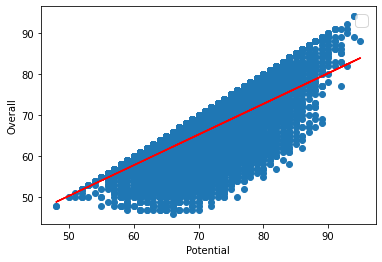

In [46]:
plt.scatter(new['Potential'], new['Overall'])
plt.legend(loc='best', fontsize=16)
plt.xlabel('Potential')
plt.ylabel('Overall')

m, b = np.polyfit(new['Potential'], new['Overall'], 1)

plt.plot(new['Potential'], m*new['Potential'] + b, 'r')

In [47]:
np.corrcoef(new['Potential'], new['Overall'])[0, 1]

0.6609385409937797

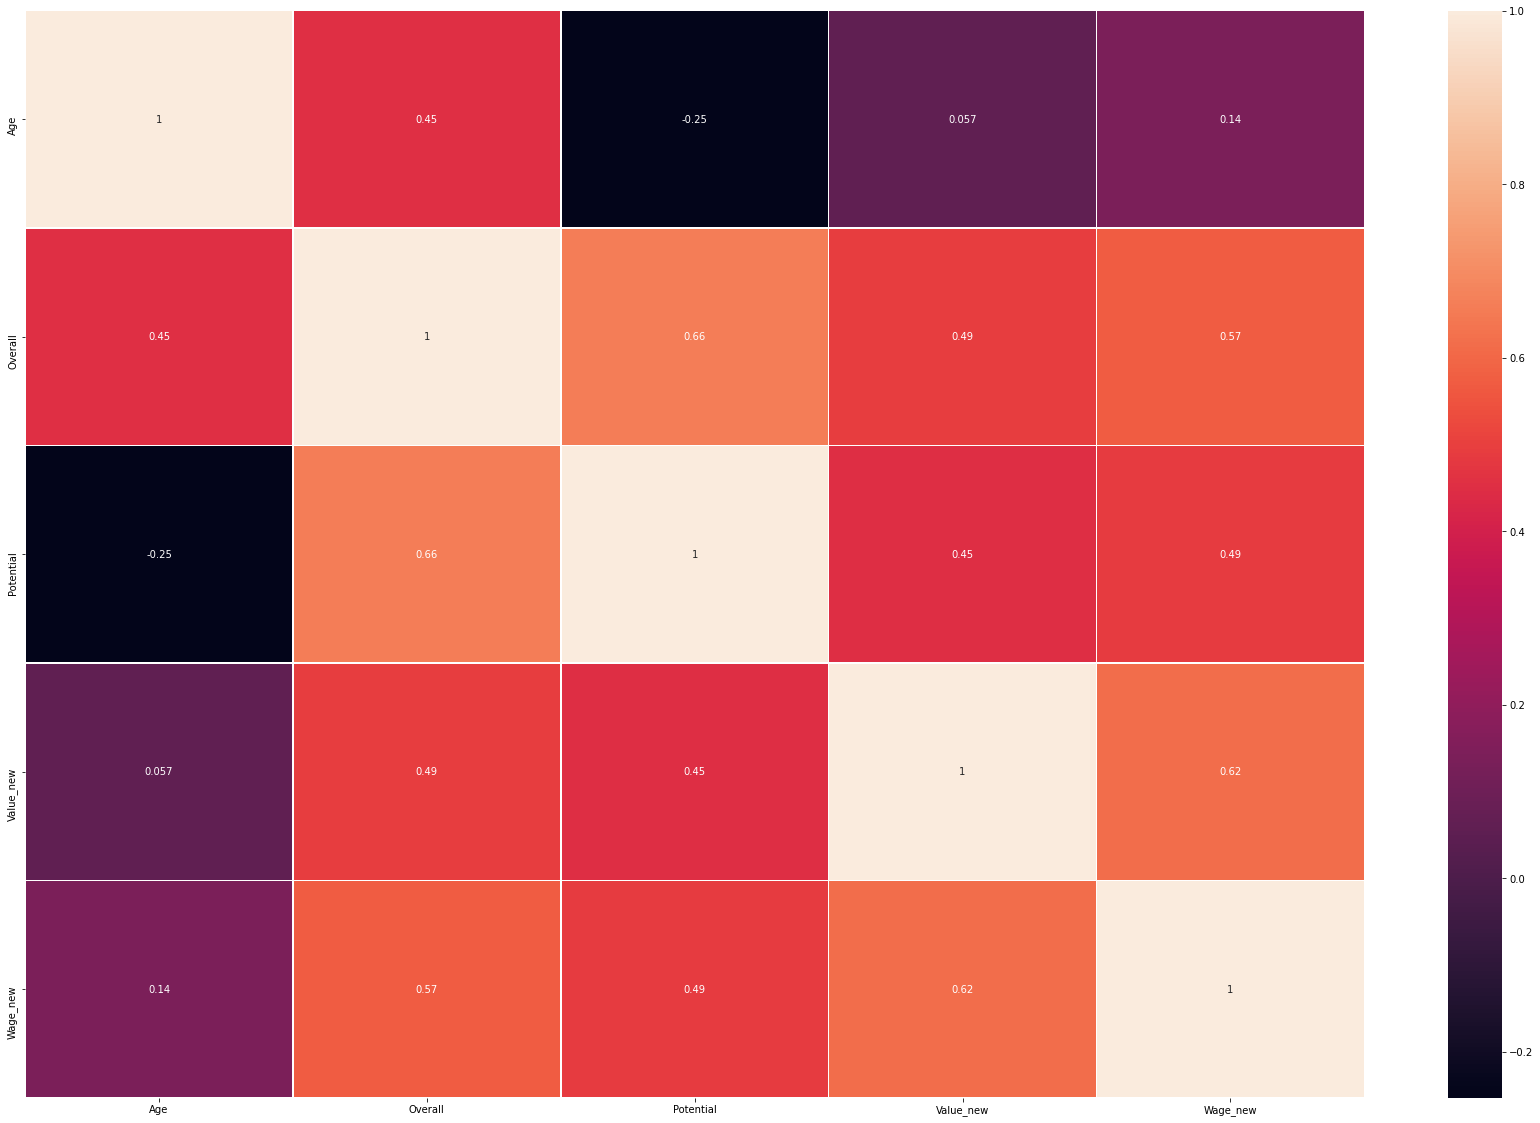

In [32]:
plt.figure(figsize=(30,20))
sns.heatmap(new.corr(),annot=True,linewidth=0.5)

In [52]:
from sklearn.linear_model import LinearRegression

split = np.random.rand(len(new)) < 0.75
train_data = new[split]
test_data = new[~split]

reg = LinearRegression()

In [54]:
from sklearn.preprocessing import PolynomialFeatures

x_train = train_data[['Age', 'Value_new', 'Potential', 'Wage_new']]
y_train = train_data[['Overall']]
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
reg.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
x_test = test_data[['Age', 'Value_new', 'Potential', 'Wage_new']]
y_test = test_data[['Overall']]
x_test_poly = poly.fit_transform(x_test)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [64]:
r_sq = reg.score(x_train_poly, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', reg.intercept_)
print('coefficients:', reg.coef_)

coefficient of determination: 0.2193924233271134
intercept: [65.46287313]
coefficients: [[-4.10990356e-17 -1.14303817e-17  3.64055173e-21  1.32780829e-23
  -3.88995425e-24  9.66961102e-25  1.79749420e-24  2.66524858e-27
   6.27297022e-26  6.79900696e-19  8.74305734e-24  7.58928868e-21
   3.70109809e-29  2.25115059e-25  2.11849871e-22 -5.00951327e-28
   1.28360778e-23 -7.05297116e-28  1.13308067e-24  1.03853557e-17
   1.32058313e-22  1.41400871e-19 -1.64313633e-28  4.38901000e-24
   3.31154326e-21 -8.72124977e-21  2.83882710e-17  1.09472888e-18
   5.82229501e-22  4.39284897e-19  1.46187537e-16  4.48639623e-27
   1.64685613e-23  1.43064747e-20  1.98737669e-18 -2.03971779e-26
  -1.08344805e-21 -3.61762211e-26  1.47551694e-23 -1.80988244e-16
   3.94338947e-24  1.59052838e-18 -4.83048292e-26  7.12670873e-23
   2.57423153e-20 -2.07673529e-22  2.25565080e-16 -1.77565818e-20
   7.31846772e-21  6.66425827e-18  5.24635369e-18  5.70578349e-27
   2.99004876e-22  1.85596136e-19 -1.50302055e-16 -1.3